In [1]:
'''
Notebook based on the paper:
"
    Gaussian Processes for Regression: A Quick Introduction
    M. Ebden
    https://arxiv.org/pdf/1505.02965.pdf
"
using NumPy and scikit-learn.
'''
import numpy
from sklearn.metrics.pairwise import pairwise_kernels

# Print helper.
def custom_print(output, header):
    return print(
        '{0} = \n'.format(header), 
        output)

# Training data
x = numpy.array([-1.50, -1.00, -0.75, -0.40, -0.25, 0.00])
x_len = len(x)
# y values guessed from paper's first chart. A good example of 
# measurement error (noise).
y = numpy.array([-1.60, -1.10, -0.40, 0.20, 0.50, 0.75])

# Hyperparameters defined by the author.
sigma_n = 0.3
sigma_f = 1.27
l = 1

# Kernel.
# Eq. (3)
# The author decided to insert the noise term into k(x, x').
# It's the second term of the k variable in the function 'kernel' 
# below.
def kernel(x1, x2):
    # Kronecker delta.
    x1_id = id(x1)
    x2_id = id(x2)
    if x1_id == x2_id:
        delta = 1
    else:
        delta = 0
    
    k = (sigma_f ** 2) * numpy.exp(
        -(x1-x2)**2 / (2*l**2)) + (sigma_n ** 2) * delta
    
    return k

# K matrix.
# Eq. (4)
K = pairwise_kernels(x.reshape((x_len,1)), metric=kernel)
custom_print(K, 'Kernel matrix')

Kernel matrix = 
 [[ 1.7029      1.42337925  1.21748079  0.88076344  0.73843943  0.52363196]
 [ 1.42337925  1.7029      1.56327628  1.34720732  1.21748079  0.9782733 ]
 [ 1.21748079  1.56327628  1.7029      1.51707449  1.42337925  1.21748079]
 [ 0.88076344  1.34720732  1.51707449  1.7029      1.59485656  1.48889436]
 [ 0.73843943  1.21748079  1.42337925  1.59485656  1.7029      1.56327628]
 [ 0.52363196  0.9782733   1.21748079  1.48889436  1.56327628  1.7029    ]]


In [2]:
# Out of sample covariate (x*).
# The aim is to infer y* from it.
x_star = 0.2

# K*
# Eq. (5)
K_star = pairwise_kernels(x.reshape((x_len,1)), numpy.array([[x_star]]), metric=kernel)
K_star = K_star.reshape((x_len,))
custom_print(K_star, 'K* matrix')

K* matrix = 
 [ 0.38023485  0.78508271  1.02714571  1.34720732  1.45758915  1.58096244]


In [3]:
# K**.
# Eq. (5)
# The Kronecker delta is based on index, not value. 
# Hence we must pass the same array (memory location) 
# when computing the kernel.
x_star_array = numpy.array([[x_star]])
K_star_star = pairwise_kernels(
    x_star_array, 
    x_star_array, 
    metric=kernel)
K_star_star = K_star_star.reshape((1,))
custom_print(K_star_star, 'K** matrix')

K** matrix = 
 [ 1.7029]


In [4]:
# Predicted y (y*).
# Eq. (8)
y_pred = numpy.matmul(K_star, numpy.matmul(numpy.linalg.inv(K), y))
custom_print(y_pred, 'y*')

y* = 
 0.877019417441


In [5]:
# var(y*).
# Eq. (9)
var_y_pred = K_star_star - numpy.matmul(K_star, numpy.matmul(numpy.linalg.inv(K), K_star.T))
custom_print(var_y_pred[0], 'var(y*)')

var(y*) = 
 0.206045043497


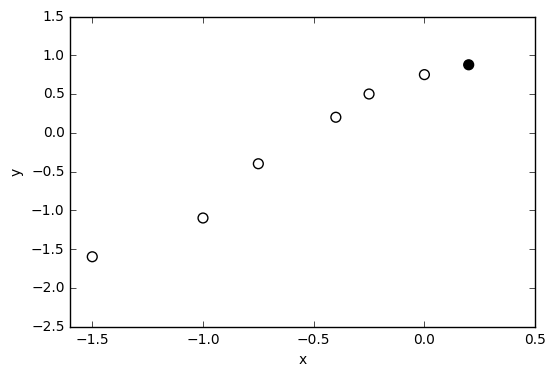

In [6]:
# Plot.
%matplotlib inline
import matplotlib.pyplot as plt

colors = numpy.ones(len(x))
colors = numpy.append(colors, 0)
plt.scatter(
    numpy.append(x, x_star), 
    numpy.append(y, y_pred), 
    s=50,
    c=colors, 
    cmap=plt.cm.bone
)
plt.axis([-1.6, 0.5, -2.5, 1.5])
plt.xlabel('x')
plt.ylabel('y')
plt.show()